## Creating a Simple Autoencoder

By: V. Ashley Villar

*Please note that these notebooks should run in ~minutes on a CPU*

In this problem set, we will use Pytorch to learn a latent space for the same galaxy image dataset we have previously played with.

In [ ]:
!pip install astronn
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from astroNN.datasets import load_galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup



# Problem 1a: Understanding our dataset...again

Our data is a little too big for us to train an autoencoder in ~1 minute. Let's lower the resolution of our images and only keep one filter. Plot an example of the lower resolution galaxies.

Next, flatten each image into a 1D array. Then rescale the flux of the images such that the mean is 0 and the standard deviation is 1. 

Galaxy10.h5: 100%|█████████▉| 209M/210M [00:06<00:00, 50.1MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:08, 25.4MB/s]                           


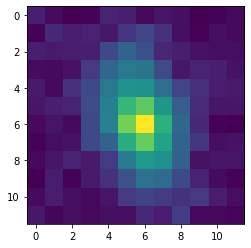

In [ ]:
images, labels = load_galaxy10()
labels = labels.astype(np.float32)
images = images.astype(np.float32)
images = torch.tensor(images)
labels = torch.tensor(labels)
images = images[:,::6,::6,1]

#Plot an example image here
plt.imshow(images[0])

#Flatten images here
images = images.reshape(len(images),-1)

#Normalize the flux of the images here
images = (images  - torch.mean(images))/torch.std(images)


# Problem 1b. 
Split the training and test set with a 66/33 split.

In [ ]:
images_train, images_test, labels_train, labels_test = train_test_split(
    images, labels, test_size=0.33, random_state=42)


# Problem 2: Understanding the Autoencoder

Below is sample of an autoencoder, built in Pytorch. Describe the code line-by-line with a partner. Add another hidden layer before and after the encoded (latent) layer (this will be a total of 2 new layers). Choose the appropriate activation function for this regression problem. Make all of the activation functions the same.

In [ ]:
class Autoencoder(torch.nn.Module):
      # this defines the model
        def __init__(self, input_size, hidden_size, hidden_inner, encoded_size):
            super(Autoencoder, self).__init__()
            print(input_size,hidden_size,encoded_size)
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.encoded_size = encoded_size
            self.hidden_inner = hidden_inner
            self.hiddenlayer1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.hiddenlayer2 = torch.nn.Linear(self.hidden_size, self.hidden_inner)
            self.encodedlayer = torch.nn.Linear(self.hidden_inner, self.encoded_size)
            self.hiddenlayer3 = torch.nn.Linear(self.encoded_size, self.hidden_inner)
            self.hiddenlayer4 = torch.nn.Linear(self.hidden_inner, self.hidden_size)
            self.outputlayer = torch.nn.Linear(self.hidden_size, self.input_size)
            # some nonlinear options
            self.sigmoid = torch.nn.Sigmoid()
            self.softmax = torch.nn.Softmax()
            self.relu = torch.nn.ReLU()
        def forward(self, x):
            layer1 = self.hiddenlayer1(x)
            activation1 = self.relu(layer1)
            layer2 = self.hiddenlayer2(activation1)
            activation2 = self.relu(layer2)
            layer3 = self.encodedlayer(activation2)
            activation3 = self.relu(layer3)
            layer4 = self.hiddenlayer3(activation3)
            activation4 = self.relu(layer4)
            layer5 = self.hiddenlayer4(activation4)
            activation5 = self.relu(layer5)
            layer6 = self.outputlayer(activation5)
            output = self.relu(layer6)
            return output, layer3

# Problem 3. Training

This is going to be a lot of guess-and-check. You've been warned. In this block, we will train the autoencoder. Add a plotting function into the training.

Note that instead of cross-entropy, we use the "mean-square-error" loss. Switch between SGD and Adam optimized. Which seems to work better? Optimize the `learning-rate` parameter and do *not* change other parameters, like momentum.

Write a piece of code to run train_model for 10 epochs. Play with the size of each hidden layer and encoded layer. When you feel you've found a reasonable learning rate, up this to 100 (or even 500 if you're patient) epochs. Hint: You want to find MSE~0.25.

In [ ]:
# train the model
def train_model(training_data,test_data, model):
  # define the optimization
  criterion = torch.nn.MSELoss()

  # Choose between these two optimizers
  #optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.005,weight_decay=1e-6)

  for epoch in range(500):
    # clear the gradient
    optimizer.zero_grad()
    # compute the model output
    myoutput, encodings_train = model(training_data)
    # calculate loss
    loss = criterion(myoutput, training_data)
    # credit assignment
    loss.backward()
    # update model weights
    optimizer.step()
    print(epoch,loss)
    # STUDENTS ADD THIS PART
    output_test, encodings_test = model(test_data)
    loss_test = criterion(output_test, test_data)
    plt.plot(epoch,loss.detach().numpy(),'ko')
    plt.plot(epoch,loss_test.detach().numpy(),'ro')
  plt.show()  

144 50 10
0 tensor(1.0026, grad_fn=<MseLossBackward0>)
1 tensor(0.9831, grad_fn=<MseLossBackward0>)
2 tensor(0.9629, grad_fn=<MseLossBackward0>)
3 tensor(0.9338, grad_fn=<MseLossBackward0>)
4 tensor(0.8871, grad_fn=<MseLossBackward0>)
5 tensor(0.8144, grad_fn=<MseLossBackward0>)
6 tensor(0.7219, grad_fn=<MseLossBackward0>)
7 tensor(0.6586, grad_fn=<MseLossBackward0>)
8 tensor(0.6579, grad_fn=<MseLossBackward0>)
9 tensor(0.6011, grad_fn=<MseLossBackward0>)
10 tensor(0.5514, grad_fn=<MseLossBackward0>)
11 tensor(0.5389, grad_fn=<MseLossBackward0>)
12 tensor(0.5391, grad_fn=<MseLossBackward0>)
13 tensor(0.5325, grad_fn=<MseLossBackward0>)
14 tensor(0.5232, grad_fn=<MseLossBackward0>)
15 tensor(0.5212, grad_fn=<MseLossBackward0>)
16 tensor(0.5247, grad_fn=<MseLossBackward0>)
17 tensor(0.5217, grad_fn=<MseLossBackward0>)
18 tensor(0.5126, grad_fn=<MseLossBackward0>)
19 tensor(0.5063, grad_fn=<MseLossBackward0>)
20 tensor(0.5045, grad_fn=<MseLossBackward0>)
21 tensor(0.5030, grad_fn=<MseLoss

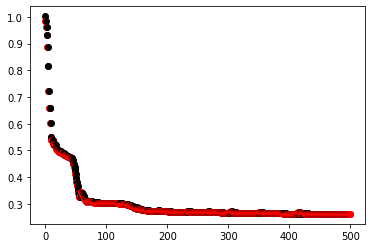

In [ ]:

model = Autoencoder(np.shape(images_train[0])[0],50,50,10)
train_model(images_train, images_test, model)


# Problem 4a. Understand our Results

Plot an image (remember you will need to reshape it to a 14x14 grid) with imshow, and plot the autoencoder output for the same galaxy. Try plotting the difference between the two. What does your algorithm do well reconstructing? Are there certain features which it fails to reproduce?

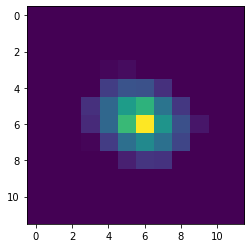

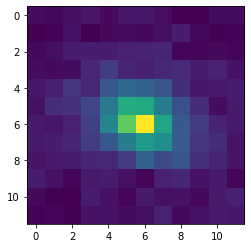

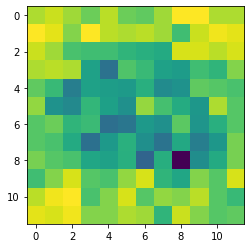

In [ ]:
yhat, test_encodings = model(images_test)
yhat = yhat.detach().numpy()
yhat = np.reshape(yhat,(len(images_test),12,12))
image_reshaped = np.reshape(images_test,(len(images_test),12,12))
rand_int = int(np.random.choice(np.arange(len(yhat))))
plt.imshow(yhat[rand_int])
plt.show()

plt.imshow(image_reshaped[rand_int])
plt.show()

plt.imshow(yhat[rand_int] - image_reshaped[rand_int].detach().numpy())
plt.show()

# Problem 4b. 

Make a scatter plot of two of the 10 latent space dimensions. Do you notice any interesting correlations between different subsets of the latent space? Any interesting clustering?

Try color coding each point by the galaxy label using `plt.scatter`

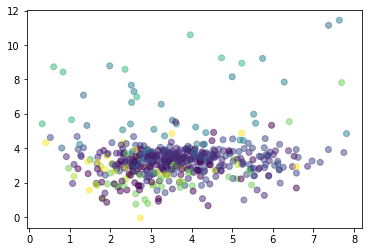

In [ ]:
plt.scatter(test_encodings[0:500,1].detach().numpy(),
            test_encodings[0:500,3].detach().numpy(),
            c = labels_test[0:500],alpha=0.5)
plt.show()

# Bonus Problem 5a Playing with the Latent Space

Create a random forest classifier to classiy each galaxy using only your latent space.

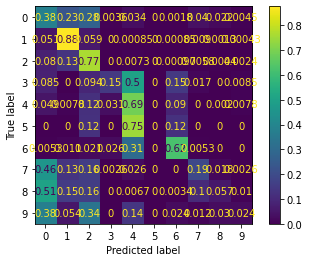

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
clf = RandomForestClassifier(max_depth=20, random_state=0)
yhat, train_encodings = model(images_train)

clf.fit(train_encodings.detach().numpy(), labels_train)
new_labels = clf.predict(test_encodings.detach().numpy())

cm = confusion_matrix(labels_test,new_labels,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Bonus Problem 5b Playing with the Latent Space

Create an isolation forest to find the most anomalous galaxies. Made a cumulative distribution plot showing the anomaly scores of each class of galaxies. Which ones are the most anomalous? Why do you think that is?

4.0


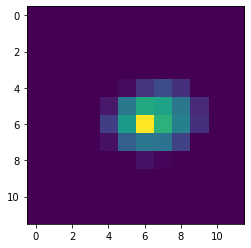

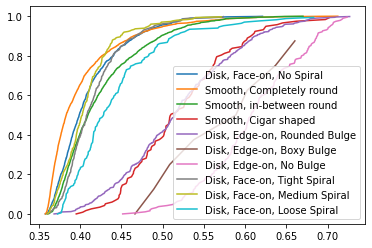

In [ ]:

encodings = test_encodings.detach().numpy()
labels = labels_test.detach().numpy()
clf = IsolationForest(random_state=0,n_estimators=1000).fit(encodings)
scores = -clf.score_samples(encodings)
print(labels[np.argmax(scores)])
plt.imshow(yhat[np.argmax(scores)].detach().numpy().reshape(12,12))
plt.show()
plt.clf()
def cdf(x, label='',plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return plt.plot(x, y, *args, **kwargs, label=label) if plot else (x, y)

ulabels = np.unique(labels)
for ulabel in ulabels:
  gind = np.where(labels==ulabel)
  cdf(scores[gind],label=galaxy10cls_lookup(ulabel))
plt.legend()
plt.show()